In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("concrete_data.csv")

In [3]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


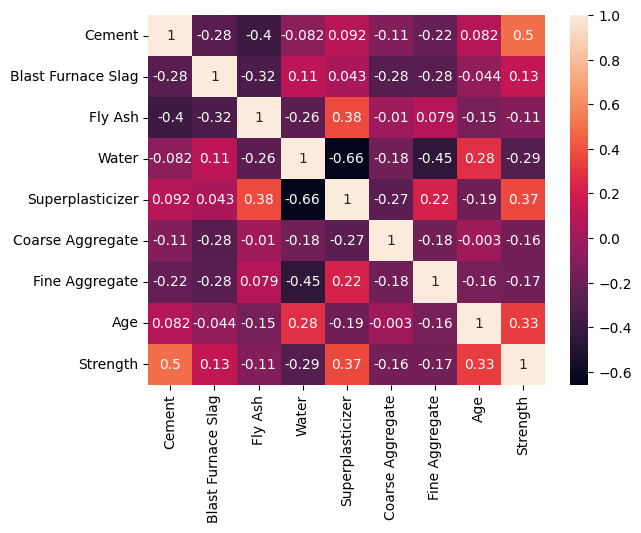

In [7]:
sns.heatmap(df.corr(), annot=True)

plt.show()

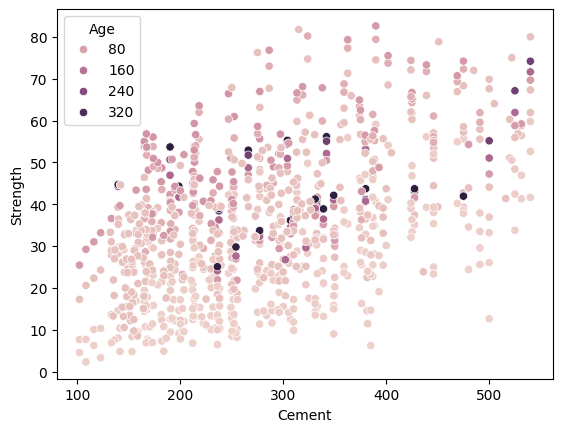

In [8]:
sns.scatterplot(data=df, x="Cement", y="Strength", hue="Age")

plt.show()

In [9]:
X = df.drop("Strength", axis=1)

y = df["Strength"]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
tree_reg1 = DecisionTreeRegressor(max_depth=3)
tree_reg1.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [14]:
y2 = y_train - tree_reg1.predict(X_train)

In [15]:
y2[:5]

919   -15.044359
641    -2.967000
535     2.098039
835   -10.123407
583    -2.334359
Name: Strength, dtype: float64

In [16]:
tree_reg2 = DecisionTreeRegressor(max_depth=4)
tree_reg2.fit(X_train, y2)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [19]:
y3 = y2 - tree_reg2.predict(X_train)

In [20]:
y3[:5]

919   -7.776773
641   -0.353441
535    9.365625
835   -4.303430
583   -3.033962
Name: Strength, dtype: float64

In [21]:
tree_reg3 = DecisionTreeRegressor(max_depth=5)
tree_reg3.fit(X_train, y3)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [22]:
y4 = y3 - tree_reg3.predict(X_train)

In [23]:
y4[:5]

919   -7.273935
641   -4.069796
535    9.868463
835   -0.701398
583   -0.579804
Name: Strength, dtype: float64

In [24]:
y_pred = sum(tree.predict(X_test) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [26]:
print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2: 0.8256386937331108
MAE: 5.191156534021624
MSE: 45.313643576494506


In [27]:
from sklearn.ensemble import GradientBoostingRegressor

In [28]:
gbr = GradientBoostingRegressor(n_estimators=3, max_depth=3, learning_rate=0.1)

In [29]:
gbr.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,3
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [30]:
y_pred = gbr.predict(X_test)

In [31]:
print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2: 0.31671418229216797
MAE: 10.724874768897646
MSE: 177.57477657969318


In [33]:
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2: 0.924730619815904
MAE: 3.374933325277294
MSE: 19.561277320698032


In [34]:
#hyperparameter tuning

In [35]:
param_grid = {
    "n_estimators": [100,150,200],
    "max_depth": [3,4,5],
    "loss": ["squared_error", "absolute_error", "huber", "quantile"],
    "learning_rate": [0.01, 0.1, 0.5]
}

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
rscv = RandomizedSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1, cv=5, param_distributions=param_grid, scoring="r2")

In [38]:
rscv.fit(X_train, y_train)
y_pred = rscv.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2: 0.9488808645329525
MAE: 2.41303648750758
MSE: 13.285024837716563


In [39]:
rscv.best_params_

{'n_estimators': 150, 'max_depth': 5, 'loss': 'huber', 'learning_rate': 0.1}